## 택시요금과 주행거리에 따른 군집분석

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os, sys
import folium
import datetime as dt

%matplotlib inline
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

plt.style.use('ggplot')
color_pal = ["#F8766D", "#D39200", "#93AA00", "#00BA38", "#00C19F", "#00B9E3", "#619CFF", "#DB72FB"]

import warnings
warnings.filterwarnings(action='ignore')

from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.cluster import KMeans, DBSCAN
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [2]:
jan_mn = pd.read_csv("jan_mn.csv")

In [3]:
jan_mn.head()

,taxi_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_community_area,dropoff_community_area,fare,tips,tolls,extras,trip_total,payment_type,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude,trip_minuate,trip_km
0,85.0,2016-1-13 06:15:00,2016-1-13 06:15:00,180.0,0.4,24.0,24.0,4.50,0.0,0.0,0.0,4.50,Cash,41.901207,-87.676356,41.901207,-87.676356,3.0,0.6437
1,4237.0,2016-1-23 17:30:00,2016-1-23 17:30:00,480.0,1.1,6.0,6.0,7.00,0.0,0.0,0.0,7.00,Cash,41.944227,-87.655998,41.944227,-87.655998,8.0,1.7703
2,1987.0,2016-1-8 18:15:00,2016-1-8 18:45:00,1080.0,6.2,8.0,3.0,17.75,0.0,0.0,0.0,17.75,Cash,41.899602,-87.633308,41.965812,-87.655879,18.0,9.9779
3,6400.0,2016-1-26 04:15:00,2016-1-26 04:15:00,60.0,0.2,16.0,16.0,3.75,0.0,0.0,0.0,3.75,Cash,41.953582,-87.723452,41.953582,-87.723452,1.0,0.3219
4,7418.0,2016-1-22 11:30:00,2016-1-22 11:45:00,180.0,0.0,8.0,32.0,5.00,2.0,0.0,1.5,8.50,Credit Card,41.892508,-87.626215,41.884987,-87.620993,3.0,0.0000


In [80]:
df = jan_mn[['trip_minuate','fare','tips','tolls','extras','trip_total','trip_km']]
df

,trip_minuate,fare,tips,tolls,extras,trip_total,trip_km
0,3.0,4.50,0.00,0.0,0.0,4.50,0.6437
1,8.0,7.00,0.00,0.0,0.0,7.00,1.7703
2,18.0,17.75,0.00,0.0,0.0,17.75,9.9779
3,1.0,3.75,0.00,0.0,0.0,3.75,0.3219
4,3.0,5.00,2.00,0.0,1.5,8.50,0.0000
...,...,...,...,...,...,...,...
1382089,9.0,12.25,2.45,0.0,0.0,14.70,0.3219
1382090,14.0,10.25,0.00,0.0,0.0,10.25,3.8624
1382091,23.0,44.00,5.00,0.0,0.0,49.00,28.8073
1382092,16.0,11.75,0.00,0.0,1.0,12.75,4.0234


In [81]:
X_list = list(df.columns)
X_list.remove('trip_total')

#### 2-2) 표준화 및 역할 정의

In [82]:
# 데이터 표준화
scaler = StandardScaler()
# 목표변수 y를 trip_total로 설정

df_raw_x = scaler.fit_transform(df[X_list])
df_raw_y = scaler.fit_transform(df[['trip_total']])

## 4. k-평균 군집분석

#### 4-1) 군집 개수 찾기 : 각 데이터로부터 가장 가까운 군집 중심점까지의 거리 제곱합


In [83]:
# 최대 군집 생성 개수
n_iter_cluster = 5
cluster_range = [i+1 for i in range(n_iter_cluster)]
clus_error = []
for v_n_clus in cluster_range : 
    clus = KMeans(v_n_clus)
    clus.fit(df_raw_x)
    # 각 데이터로 부터 가장 가까운 군집 중심점까지 거리 제곱합
    clus_error.append(clus.inertia_)
ds_error = pd.DataFrame({'NumberofCluster' : cluster_range,
                        'Error' : clus_error})
ds_error

,NumberofCluster,Error
0,1,8.292564e+06
1,2,7.025473e+06
2,3,5.817038e+06
3,4,4.580947e+06
4,5,3.490555e+06


#### 4-2) 군집별 군집 중시점까지 거리 제곱합 시각화

Text(0, 0.5, 'Sum of squared distance')

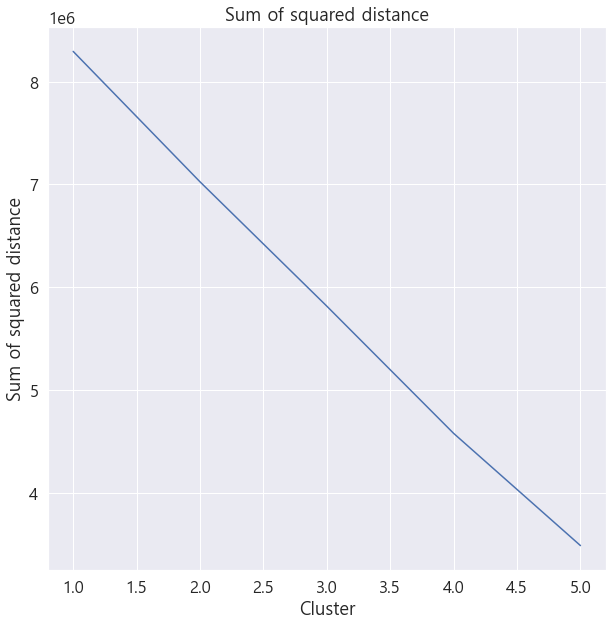

In [84]:
plt.figure(figsize = (10,10))
plt.plot(ds_error['NumberofCluster'], ds_error['Error'])
plt.title("Sum of squared distance")
plt.xlabel('Cluster')
plt.ylabel('Sum of squared distance')

#### 4-3) k-평균 군집 번호 생성

In [85]:
clus = KMeans(5)
clus.fit(df_raw_x)
cluster_kmeans = [i+1 for i in clus.labels_]
df['ClusterKmeans'] = cluster_kmeans
df.head()

,trip_minuate,fare,tips,tolls,extras,trip_total,trip_km,ClusterKmeans
0,3.0,4.50,0.0,0.0,0.0,4.50,0.6437,1
1,8.0,7.00,0.0,0.0,0.0,7.00,1.7703,1
2,18.0,17.75,0.0,0.0,0.0,17.75,9.9779,1
3,1.0,3.75,0.0,0.0,0.0,3.75,0.3219,1
4,3.0,5.00,2.0,0.0,1.5,8.50,0.0000,1


#### 4-4) k-평균 군집별 데이터 요약

In [86]:
ds_summary_km = df.groupby("ClusterKmeans").agg(['min','mean','max'])
level0 = ds_summary_km.columns.get_level_values(0)
level1 = ds_summary_km.columns.get_level_values(1)
ds_summary_km.columns = level0 + '_' + level1
ds_summary_km.reset_index(inplace = True)
ds_summary_km.round(3)

,ClusterKmeans,trip_minuate_min,trip_minuate_mean,trip_minuate_max,fare_min,fare_mean,fare_max,tips_min,tips_mean,tips_max,...,tolls_max,extras_min,extras_mean,extras_max,trip_total_min,trip_total_mean,trip_total_max,trip_km_min,trip_km_mean,trip_km_max
0,1,0.0,9.595,70.0,0.00,9.803,300.00,0.0,0.794,7.15,...,75.00,0.00,0.516,1556.55,0.00,11.114,1562.55,0.0,3.018,321.869
1,2,0.0,33.637,1439.0,0.00,39.015,3186.50,0.0,7.804,369.08,...,75.00,0.00,2.865,101.00,0.00,49.692,3186.50,0.0,24.128,4828.032
2,3,3.0,13.583,56.0,4000.64,6691.447,9002.29,0.0,0.000,0.00,...,50.00,0.00,0.094,0.40,4050.74,6735.290,9052.39,0.0,42.473,1006.001
3,4,0.0,6.839,24.0,3.25,8.784,33.75,0.0,0.000,0.00,...,0.00,3333.33,5524.261,9993.41,3336.58,5533.045,9997.16,0.0,1.594,18.025
4,5,42.0,42.000,42.0,999.99,999.990,999.99,0.0,0.000,0.00,...,999.99,999.99,999.990,999.99,2999.97,2999.970,2999.97,0.0,0.000,0.000


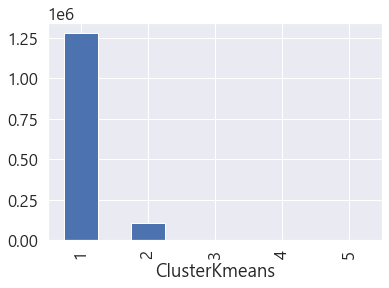

In [87]:
df.groupby('ClusterKmeans')['trip_total'].count().plot(kind='bar')

군집의 분포가 너무 불균형해서 이상치들을 제거하고 해본다.

In [88]:
df = jan_mn[['trip_seconds','trip_miles','fare','tips','tolls','extras','trip_total','trip_km']]
df

,trip_seconds,trip_miles,fare,tips,tolls,extras,trip_total,trip_km
0,180.0,0.4,4.50,0.00,0.0,0.0,4.50,0.6437
1,480.0,1.1,7.00,0.00,0.0,0.0,7.00,1.7703
2,1080.0,6.2,17.75,0.00,0.0,0.0,17.75,9.9779
3,60.0,0.2,3.75,0.00,0.0,0.0,3.75,0.3219
4,180.0,0.0,5.00,2.00,0.0,1.5,8.50,0.0000
...,...,...,...,...,...,...,...,...
1382089,540.0,0.2,12.25,2.45,0.0,0.0,14.70,0.3219
1382090,840.0,2.4,10.25,0.00,0.0,0.0,10.25,3.8624
1382091,1380.0,17.9,44.00,5.00,0.0,0.0,49.00,28.8073
1382092,960.0,2.5,11.75,0.00,0.0,1.0,12.75,4.0234


[7.0, 14.25]


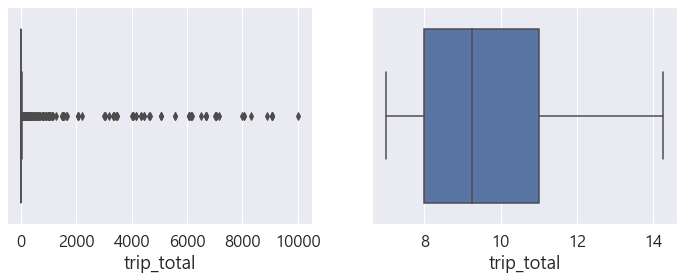

In [89]:
# trip_total 이상치 제거
tmp = list(df.trip_total.quantile([0.25, 0.75]))
print(tmp)
df_no = df[(df['trip_total'] >= tmp[0]) & (df['trip_total'] <= tmp[1])]

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
sns.boxplot(df_no['trip_total'], ax=ax[1])
sns.boxplot(df['trip_total'], ax=ax[0])


In [90]:
X_list = list(df_no.columns)
X_list.remove('trip_total')

## 이상치 제거 후 군집분석 : trip_total

In [91]:
# 데이터 표준화
scaler = StandardScaler()
# 목표변수 y를 trip_total로 설정

df_raw_x = scaler.fit_transform(df_no[X_list])
df_raw_y = scaler.fit_transform(df_no[['trip_total']])

#### 4-1) 군집 개수 찾기 : 각 데이터로부터 가장 가까운 군집 중심점까지의 거리 제곱합


In [92]:
# 최대 군집 생성 개수
n_iter_cluster = 3
cluster_range = [i+1 for i in range(n_iter_cluster)]
clus_error = []
for v_n_clus in cluster_range : 
    clus = KMeans(v_n_clus)
    clus.fit(df_raw_x)
    # 각 데이터로 부터 가장 가까운 군집 중심점까지 거리 제곱합
    clus_error.append(clus.inertia_)
ds_error = pd.DataFrame({'NumberofCluster' : cluster_range,
                        'Error' : clus_error})
ds_error

,NumberofCluster,Error
0,1,4.885657e+06
1,2,3.742676e+06
2,3,3.047614e+06


#### 4-2) 군집별 군집 중시점까지 거리 제곱합 시각화

Text(0, 0.5, 'Sum of squared distance')

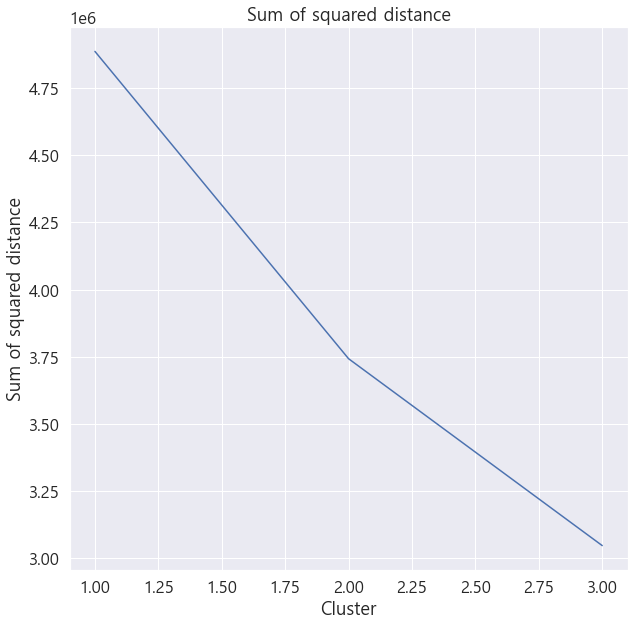

In [93]:
plt.figure(figsize = (10,10))
plt.plot(ds_error['NumberofCluster'], ds_error['Error'])
plt.title("Sum of squared distance")
plt.xlabel('Cluster')
plt.ylabel('Sum of squared distance')

#### 4-3) k-평균 군집 번호 생성

In [94]:
clus = KMeans(3)
clus.fit(df_raw_x)
cluster_kmeans = [i+1 for i in clus.labels_]
df_no['ClusterKmeans'] = cluster_kmeans
df_no.head()

,trip_seconds,trip_miles,fare,tips,tolls,extras,trip_total,trip_km,ClusterKmeans
1,480.0,1.1,7.00,0.0,0.0,0.0,7.00,1.7703,1
4,180.0,0.0,5.00,2.0,0.0,1.5,8.50,0.0000,2
5,480.0,1.3,7.00,1.0,0.0,0.0,8.00,2.0921,2
6,420.0,0.0,7.25,0.0,0.0,0.0,7.25,0.0000,1
9,480.0,0.1,9.00,0.0,0.0,0.0,9.00,0.1609,1


#### 4-4) k-평균 군집별 데이터 요약

In [95]:
ds_summary_km = df_no.groupby("ClusterKmeans").agg(['min','mean','max'])
level0 = ds_summary_km.columns.get_level_values(0)
level1 = ds_summary_km.columns.get_level_values(1)
ds_summary_km.columns = level0 + '_' + level1
ds_summary_km.reset_index(inplace = True)
ds_summary_km.round(3)

,ClusterKmeans,trip_seconds_min,trip_seconds_mean,trip_seconds_max,trip_miles_min,trip_miles_mean,trip_miles_max,fare_min,fare_mean,fare_max,...,tolls_max,extras_min,extras_mean,extras_max,trip_total_min,trip_total_mean,trip_total_max,trip_km_min,trip_km_mean,trip_km_max
0,1,0.0,613.299,86340.0,0.0,1.474,100.0,2.00,8.926,14.25,...,2.0,0.0,0.511,11.0,7.0,9.494,14.25,0.000,2.372,160.934
1,2,0.0,461.462,2460.0,0.0,1.074,100.0,0.00,7.313,12.25,...,4.0,0.0,0.381,9.0,7.0,9.846,14.25,0.000,1.728,160.934
2,3,60.0,618.221,1920.0,110.0,202.088,540.0,5.65,8.933,14.25,...,0.0,0.0,0.343,4.0,7.0,10.090,14.25,177.028,325.230,869.046


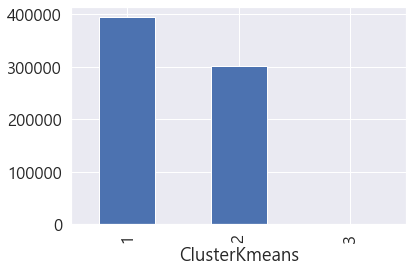

In [96]:
df_no.groupby('ClusterKmeans')['trip_total'].count().plot(kind='bar')

In [97]:
# 군집 번호 별로 데이터 프레임 생성
df_1 = df_no[df_no['ClusterKmeans'] == 1]
df_2 = df_no[df_no['ClusterKmeans'] == 2]
df_3 = df_no[df_no['ClusterKmeans'] == 3]

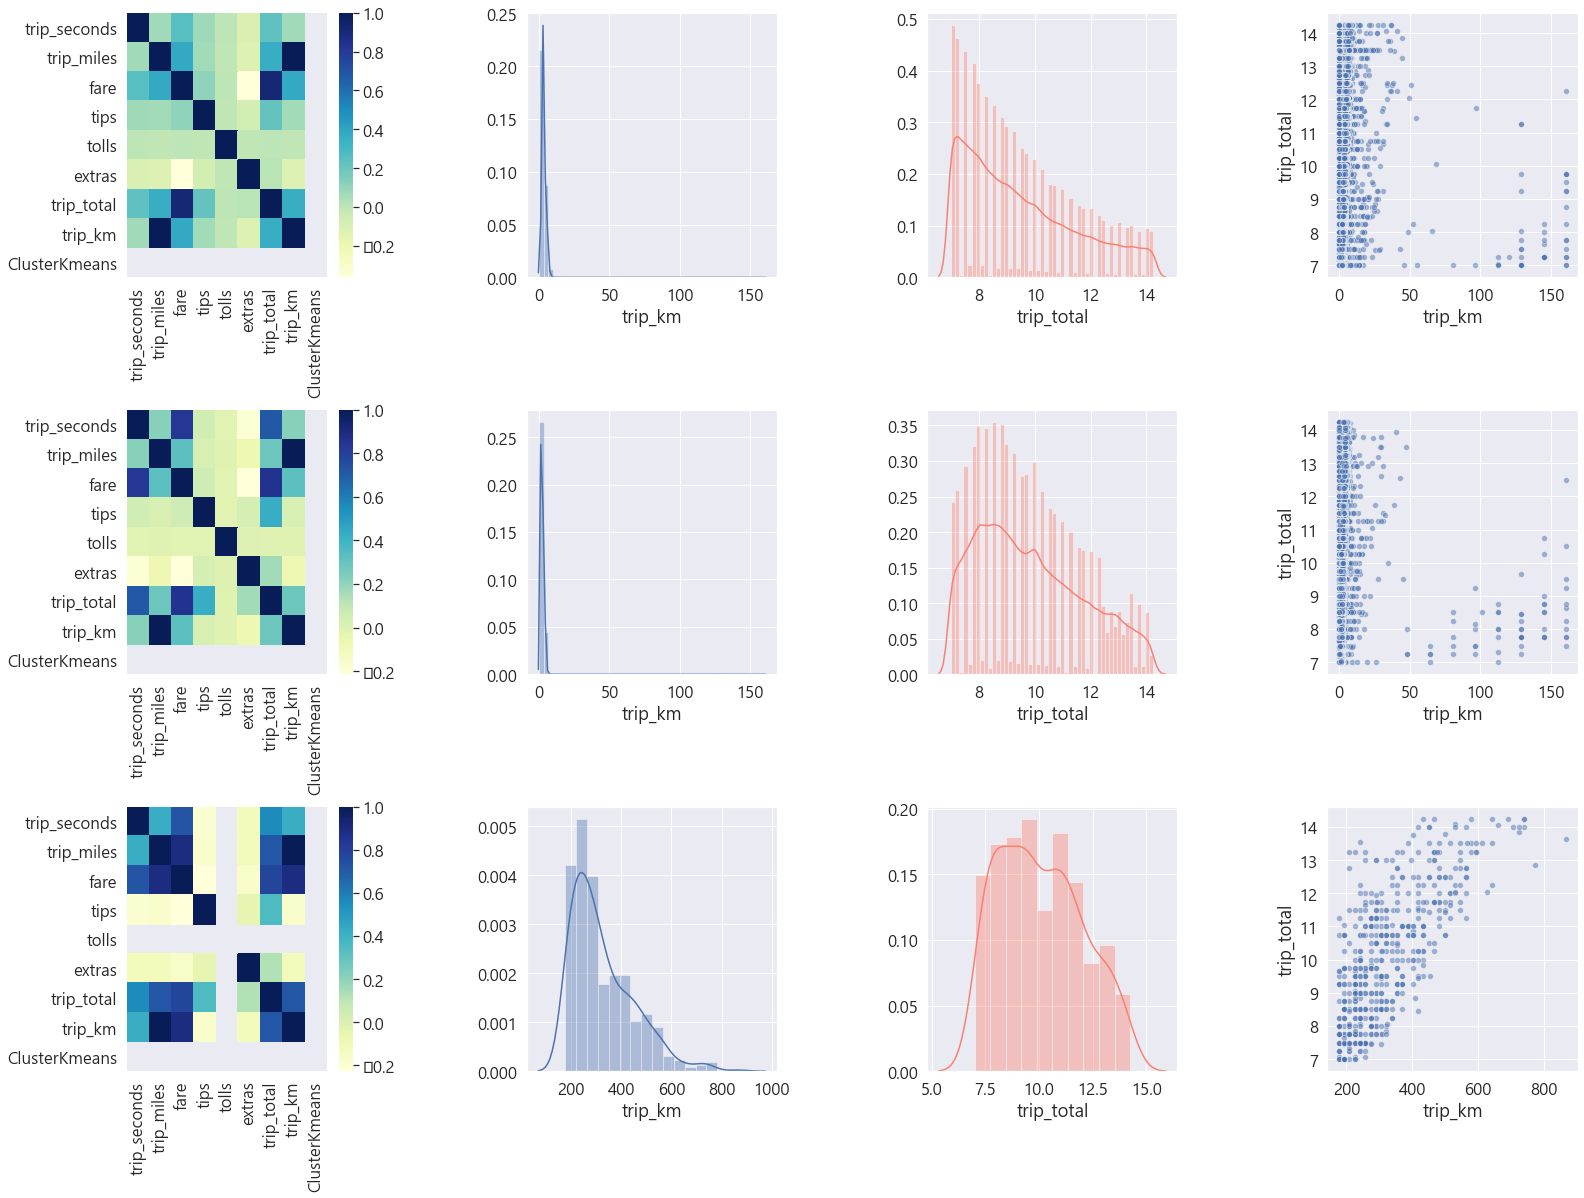

In [108]:
fig, ax = plt.subplots(nrows=3, ncols=4, figsize=(26,15))

sns.heatmap(df_1.corr(),cmap='YlGnBu',fmt='.1g', ax=ax[0,0])
sns.heatmap(df_2.corr(),cmap='YlGnBu',fmt='.1g', ax=ax[1,0])
sns.heatmap(df_3.corr(),cmap='YlGnBu',fmt='.1g', ax=ax[2,0])

sns.distplot(df_1.trip_km, ax=ax[0,1])
sns.distplot(df_2.trip_km, ax=ax[1,1])
sns.distplot(df_3.trip_km, ax=ax[2,1])

sns.distplot(df_1.trip_total, ax=ax[0,2], color='salmon')
sns.distplot(df_2.trip_total, ax=ax[1,2], color='salmon')
sns.distplot(df_3.trip_total, ax=ax[2,2], color='salmon')

sns.scatterplot(data=df_1, y='trip_total', x='trip_km', ax=ax[0,3], alpha=0.5)
sns.scatterplot(data=df_2, y='trip_total', x='trip_km', ax=ax[1,3], alpha=0.5)
sns.scatterplot(data=df_3, y='trip_total', x='trip_km', ax=ax[2,3], alpha=0.5)
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.5, wspace=0.6)

- 첫 번째 군집1을 보면, 가장 일반적인 택시 이용을 한 군집이라 할 수 있다. 총 요금(trip_total)과 fare가 상당히 높은 상관관계를 보여주고 tips와 tolls, extras 등이 다른 군집에 비해 상관계수가 높지 않다.
- 기본요금만 지불하는 정도의 택시 이용 건들이라고 할 수 있다. 산포도를 살펴보면 0~25km 정도까지 구간에 거의 대부분이 분포해있다.

- 두 번쨰 군집은 군집1과 거의 비슷하지만 총 요금이 주행 시간과 좀 더 

In [102]:
print(len(df_1), len(df_2), len(df_3))

395766 301668 517
